1. 

51
100
105
256


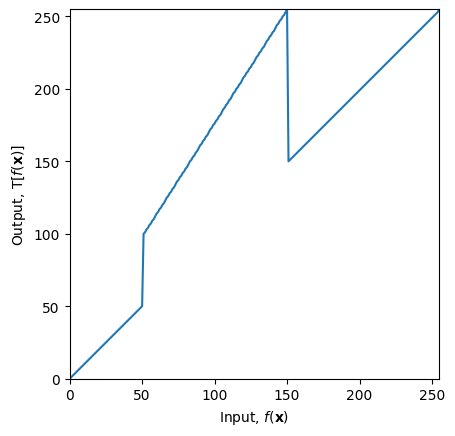

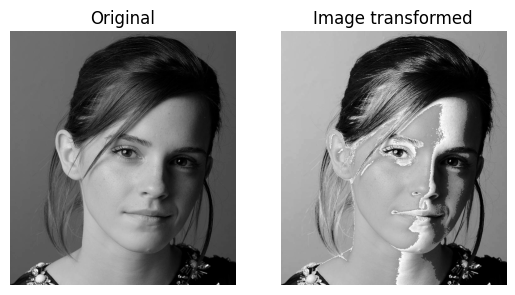

In [10]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50,100),(150,255),(150,150)])#cordinates of the line segments in transformation

t1 = np.linspace(0, c[0,1], c[0,0]+1 -0).astype('uint8')#create array of 51 numbers having values form 0 -50
print(len(t1))
t2 = np.linspace(c[1,1], c[2,1], c[2,0]- c[1,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[3,1],255,255 - c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis =0).astype('uint8')
transform = np.concatenate((transform,t3), axis =0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

img_org = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap ='gray')
ax[0].set_title('Original')
ax[0].axis('off')
image_transformed=cv.LUT(img_org, transform)
ax[1].imshow(image_transformed, cmap ='gray')
ax[1].set_title('Image transformed')
ax[1].axis('off')

plt.show()

2. a 

175
36
45
256


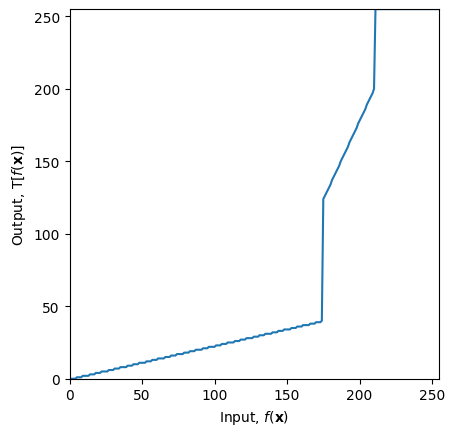

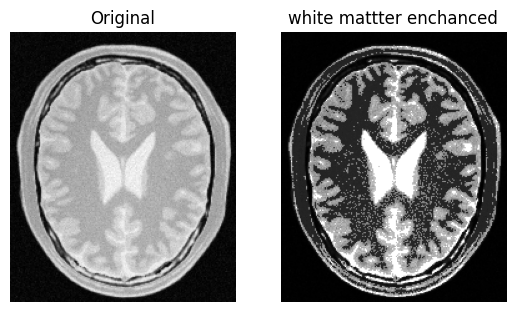

In [6]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(174,40),(174,124),(210,200),(210,255)])#cordinates of the line segments in transformation

t1 = np.linspace(0, c[0,1], c[0,0]+1 -0).astype('uint8')#create array of 51 numbers having values form 0 -50
print(len(t1))
t2 = np.linspace(c[1,1], c[2,1], c[2,0]- c[1,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[3,1],255,255 - c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis =0).astype('uint8')
transform = np.concatenate((transform,t3), axis =0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

img_org = cv.imread('BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap ='gray')
ax[0].set_title('Original')
ax[0].axis('off')
image_white=cv.LUT(img_org, transform)
ax[1].imshow(image_white, cmap ='gray')
ax[1].set_title('white mattter enchanced')
ax[1].axis('off')


plt.show()

2. b

121
58
77
256


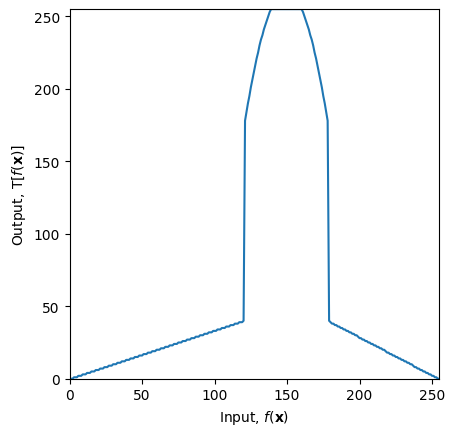

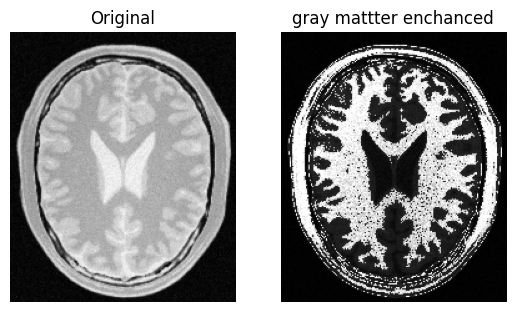

In [7]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(120,40),(120,180),(178,255),(178,0)])#cordinates of the line segments in transformation

t1 = np.linspace(0, c[0,1], c[0,0]+1 -0).astype('uint8')#create array of 51 numbers having values form 0 -50
print(len(t1))

x_values = np.linspace(-1, 1, c[2,0]- c[1,0])
#y_values = min(((174 + 120*(1- x_values**2)),255))
y_values = np.minimum(178 + 90 * (1 - x_values**2), 255)

t2 = y_values.astype('uint8')


#t2 = np.linspace(c[1,1], c[2,1], c[2,0]- c[1,0]).astype('uint8')
print(len(t2))



t3 = np.linspace(40,0,255 - c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis =0).astype('uint8')
transform = np.concatenate((transform,t3), axis =0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

img_org = cv.imread('BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap ='gray')
ax[0].set_title('Original')
ax[0].axis('off')
image_gray=cv.LUT(img_org, transform)
ax[1].imshow(image_gray, cmap ='gray')
ax[1].set_title('gray mattter enchanced')
ax[1].axis('off')

plt.show()

3. 

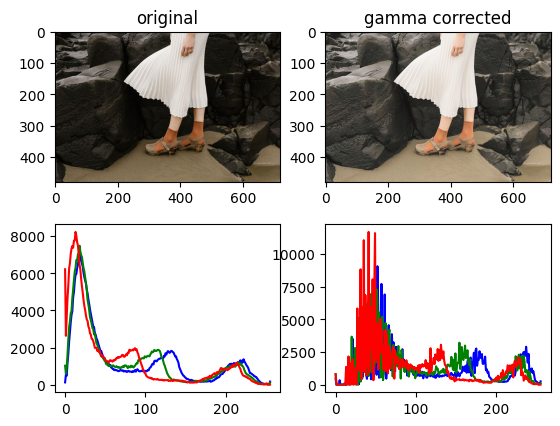

In [46]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)

#gamma corection
gamma = 0.56
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_process = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
L, a, b = cv.split(img_process)
L_Correct = cv.LUT(L,table)
img_gamma = cv.merge((L_Correct, a, b))
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
fig, axarr = plt.subplots(2,2)
axarr[0,0].imshow(img_orig)
axarr[0,0].set_title('original')
axarr[0,1].imshow(img_gamma)
axarr[0,1].set_title('gamma corrected')
#Histograms
color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig] , [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma] , [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)
plt.show()
#Highgui show
img_orig = cv.cvtColor(img_orig, cv.COLOR_RGB2BGR)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_RGB2BGR)
cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.imshow('Image', img_orig)
cv.waitKey(0)
cv.imshow('image', img_gamma)
cv.waitKey(0)
cv.destroyAllWindows()

4.

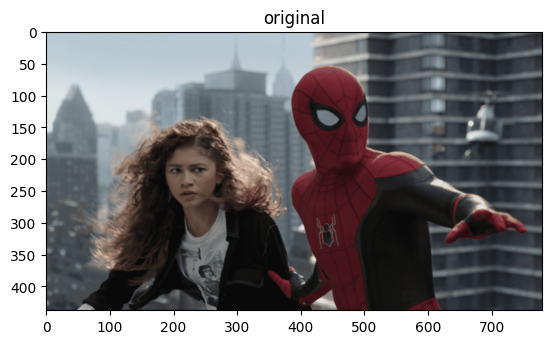

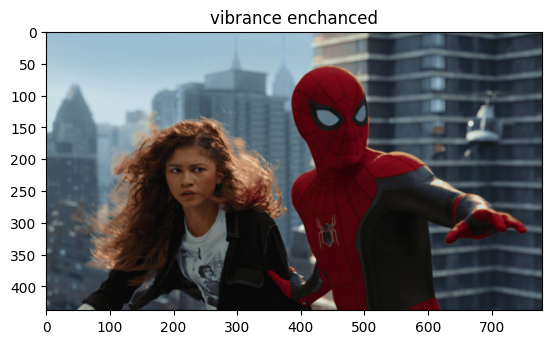

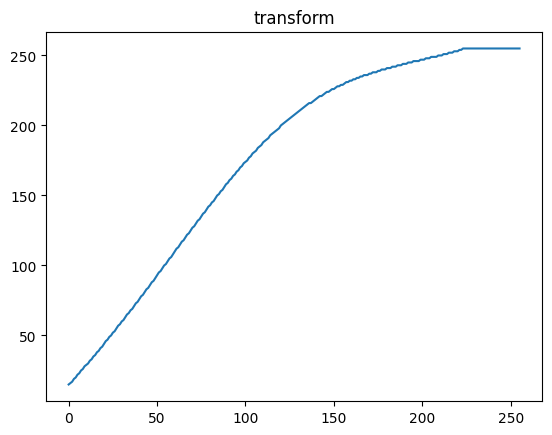

In [62]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_org = cv.imread('spider.png',cv.IMREAD_COLOR)
img_process = cv.cvtColor(img_org, cv.COLOR_BGR2HSV)
hue, saturation, value = cv.split(img_process)

a = 0.63
sigma = 70
x = np.linspace(0, 255, 256)
y = np.minimum((x + a*128*np.exp(-((x - 128) ** 2 / (2 * sigma ** 2)))), 255)
transform = y.astype('uint8')
sat_enh = cv.LUT(saturation, transform)

img_enchnace = cv.merge((hue , sat_enh, value))

fig, ax = plt.subplots()
img_org = cv.cvtColor(img_org, cv.COLOR_BGR2RGB)
ax.imshow(img_org)
ax.set_title('original')
fig, ax = plt.subplots()
img_enchnace = cv.cvtColor(img_enchnace, cv.COLOR_HSV2RGB)
ax.imshow(img_enchnace)
ax.set_title('vibrance enchanced')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title('transform')
plt.show()


5.

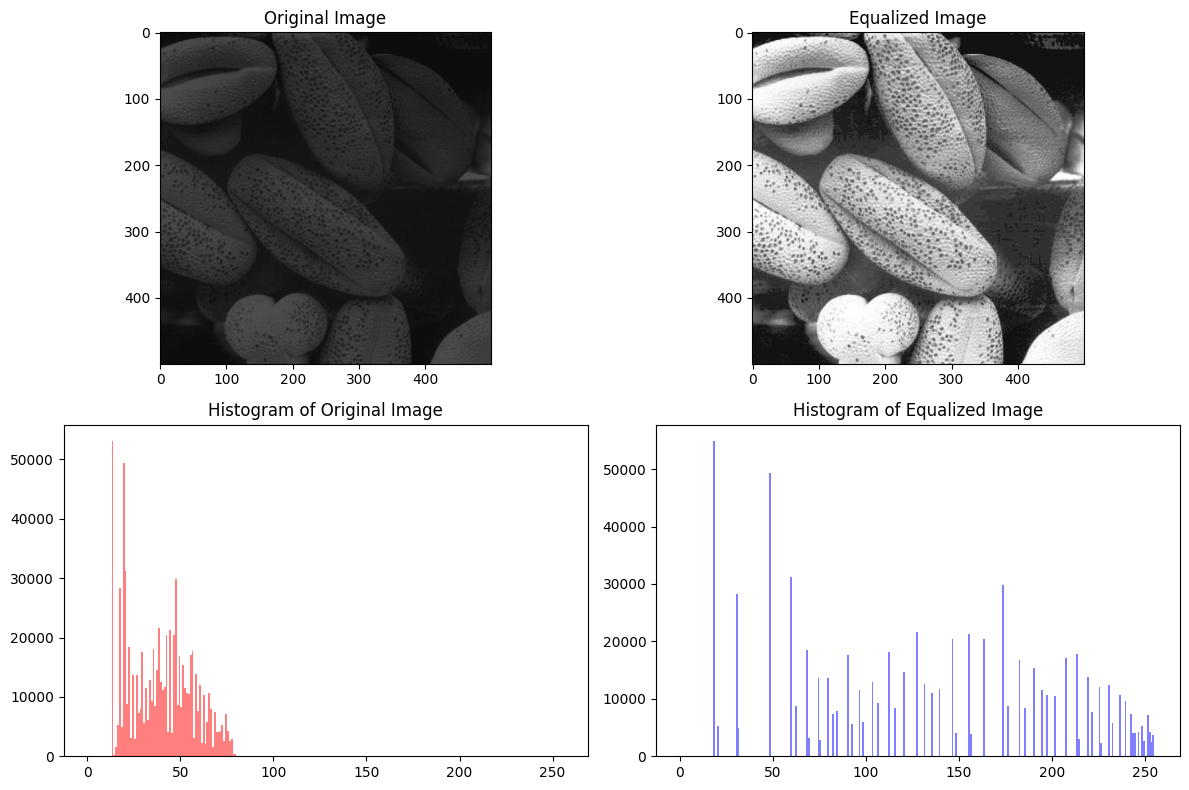

In [94]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def equalizeHist(image):
    hist = np.histogram(image, 256, [0, 256])
    cdf = hist[0].cumsum()
    cdf_normalized = ((cdf) * 255) / (cdf.max())
    equalized_image = np.interp(image, np.arange(256), cdf_normalized).astype('uint8')
    return equalized_image

img = cv.imread('shells.tif',cv.IMREAD_COLOR)
img_equalized = equalizeHist(img)

fig, ax = plt.subplots(2,2,figsize=(12, 8))
# Plot the original and equalized images
ax[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0, 0].set_title("Original Image")
ax[0, 1].imshow(cv.cvtColor(img_equalized, cv.COLOR_BGR2RGB))
ax[0, 1].set_title("Equalized Image")
# Plot histograms
ax[1, 0].hist(img.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5)
ax[1, 0].set_title("Histogram of Original Image")
ax[1, 1].hist(img_equalized.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5)
ax[1, 1].set_title("Histogram of Equalized Image")

# Show the plots
plt.tight_layout()
plt.show()


6.